# Exploratory analysis: White Wine

This notebook contains a variety of techniques you can use in an exploratory analysis of an unseen dataset. In an exploratory analysis, we aren't necessarily going in with any particular goal. Rather, we are just trying to understand the data, and see if there are any interesting insights we can glean from it.

Because the nature of an exploratory analysis depends on the dataset and what you hope to do with it, there are no hard and fast rules for how to conduct an analysis. However, the techniques shown in this notebook are a good place to start.

This analysis is conducted on a dataset of while wines. It contains a basic analysis of the data with an emphasis on analyzing correlations found in the data.

In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/CUNY-CISC-3225/datasets/main/wine_quality/winequality-white.csv", delimiter=";")

In [16]:
# A quick look at the dataset reveals its structure: the majority of columns are
# from various chemical properties of each wine. The only unusual column is
# "quality", which contains a subjective evaluation of the wine. The higher the
# rating, the better the wine.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
# This data does not contain any missing values, and the columns are all of a
# reasonable type considering what they contain.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [18]:
# Out of all the columns, only quality is an integer.
# Let's see if we can find out the rating scale. Based on what
# we see below, the scale is likely something like 1-10, but
# not every number between 1 and 10 are used. The majority of
# wines were rated 6, which is OK assuming a 1-10 scale.
# Very few wines are rated at extreme values - most are moderate,
# very few are excellent (9), and a few are terrible (4, 3).
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

<Axes: xlabel='quality'>

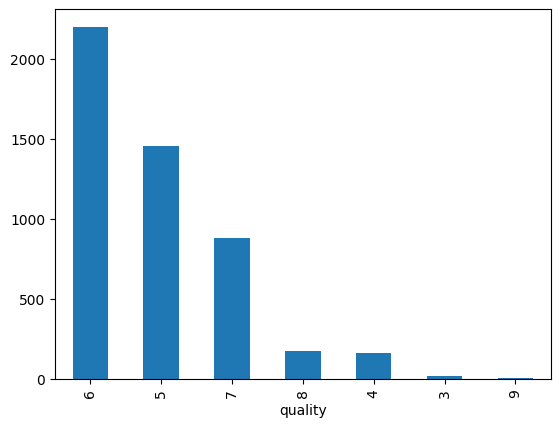

In [19]:
df.quality.value_counts().plot.bar()

<Axes: >

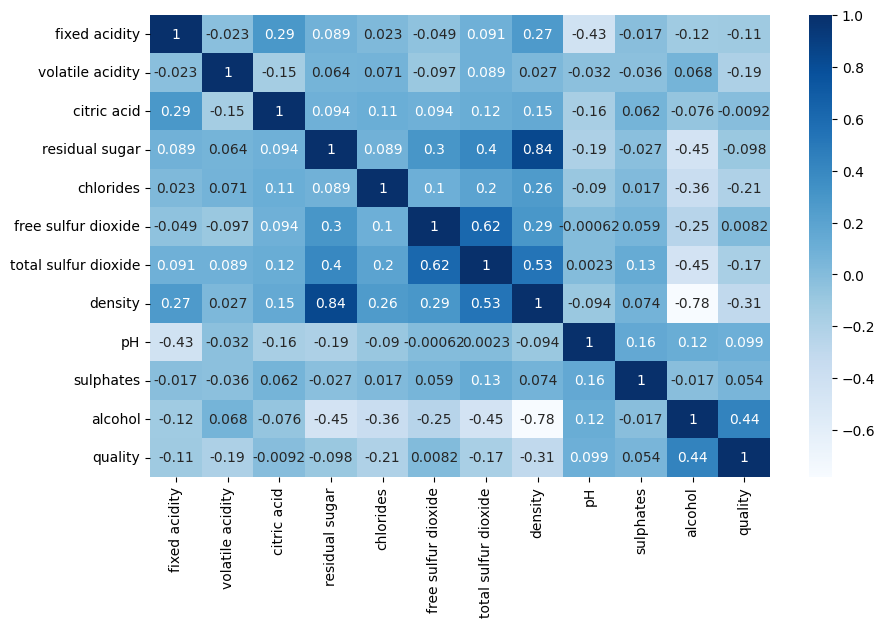

In [20]:
# Looking at correlations between different columns are interesting, and are a
# good demonstration of how domain knowledge about the dataset can be useful.
# If you know a lot about wine, or have ever done homebrewing before, many
# of these correlations make a lot of sense. Here is a review of a few notable
# correlations:
#
# - There is a strong positive correlation between density and residual
#   sugar. Sugar is very dense, so it makes sense that wines with more sugar
#   are more dense.
# - There is a strong negative correlation between residual sugar and alcohol.
#   During fermentation, yeast convert sugar into alcohol. So, generally speaking,
#   the sweeter a wine is, the less alcohol it has. Conversely, the drier a wine
#   is, the more alcohol it has.
# - Similarly, there is a strong negative correlation between alcohol and density.
#   This can be explained two ways: first, as discussed above, higher alcohol
#   is associated with less residual sugar, and sugar contributes to the density
#   of the wine. Additionally, alcohol is less dense than water, so lots of
#   alcohol will not contribute a lot to the overall density of the wine.
# - There is a weak positive correlation between alcohol and quality.

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

<Axes: xlabel='alcohol', ylabel='density'>

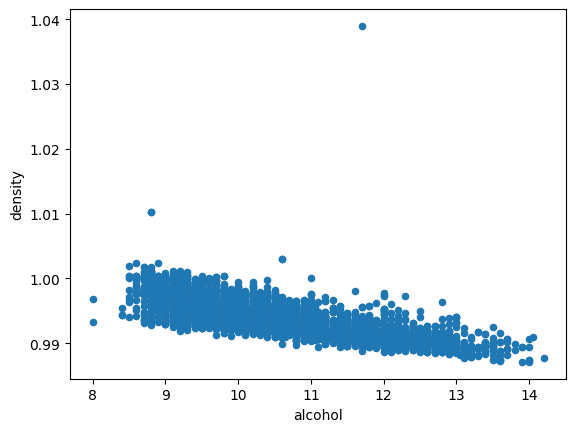

In [21]:
# We can plot a few of the correlations:
df.plot.scatter(x='alcohol', y='density')

<Axes: xlabel='residual sugar', ylabel='density'>

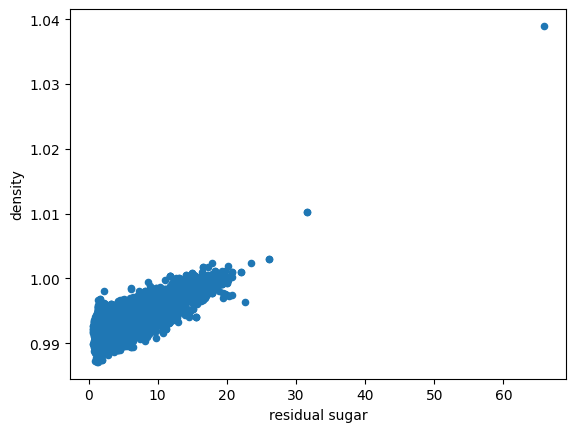

In [22]:
df.plot.scatter(x='residual sugar', y='density')

<Axes: xlabel='residual sugar', ylabel='alcohol'>

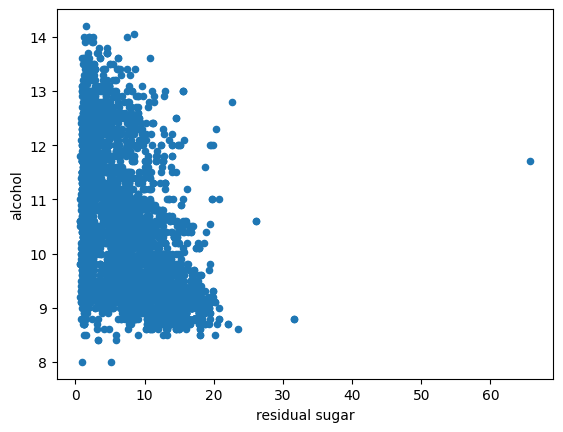

In [23]:
df.plot.scatter(x='residual sugar', y='alcohol')

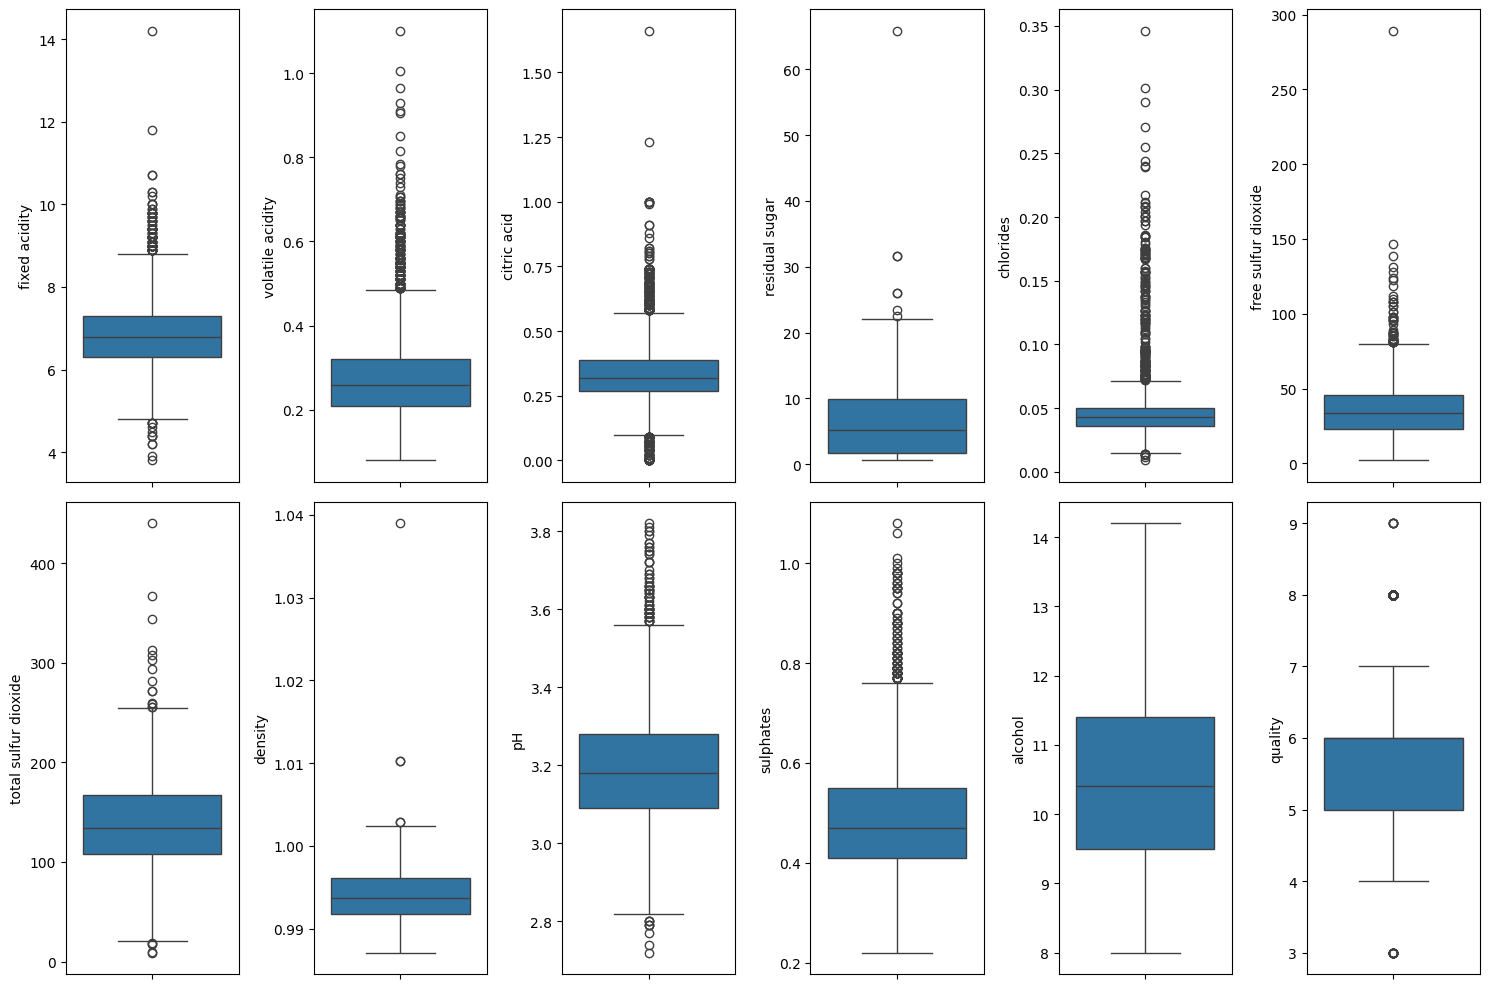

In [24]:
# For a box plot, we see there are some outliers. Volatile acidity, citric acid,
# chlorides, and density seem to have the most extreme outliers.
plt.figure(figsize=(15, 10))
for i in range(len(df.columns)):
  plt.subplot(2, len(df.columns)//2, i+1)
  sns.boxplot(y=df[df.columns[i]], orient='v')
  plt.tight_layout()

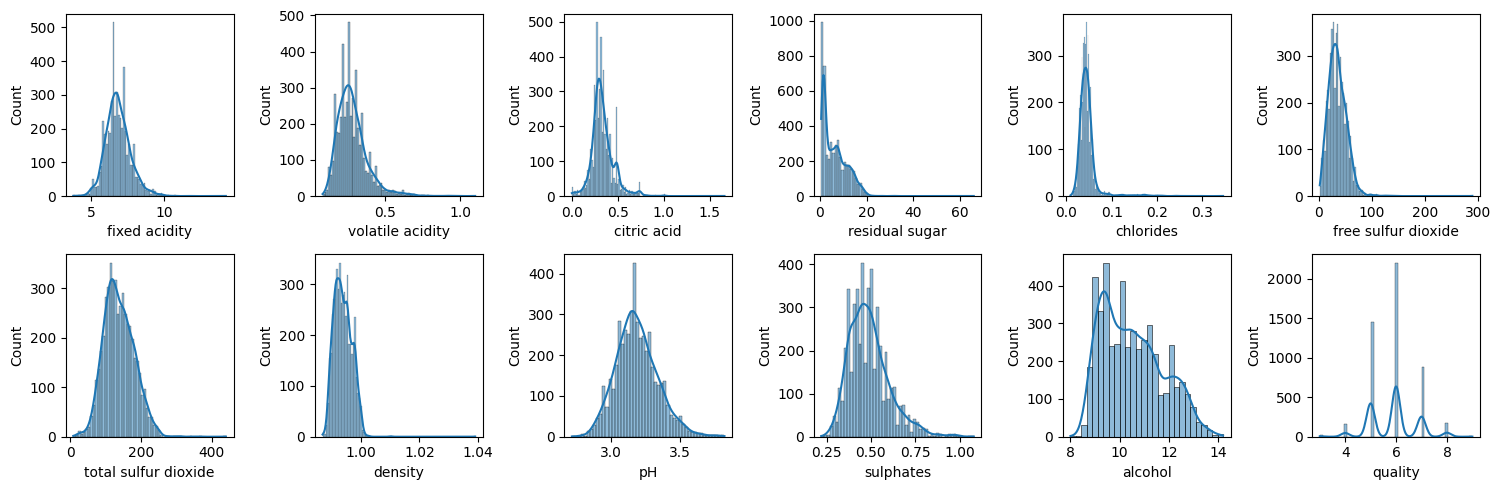

In [25]:
# Finally, in analyzing the histogram, we see that many variables are approximately
# a normal distribution with some skew.
plt.figure(figsize=(15,5))
for i in range(len(df.columns)):
  plt.subplot(2, len(df.columns)//2, i+1)
  sns.histplot(df[df.columns[i]], kde=True)
  plt.tight_layout()

In [28]:
# Use pearson to calculate the linear regression of this. using linregress


print("Red wine citric acid:", df['citric acid'].mean())



Red wine citric acid: 0.33419150673744386


In [29]:
# Use T Test to calculate the statstitical  difference on these cases.
df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Testing usingStatistical Test